<a href="https://colab.research.google.com/github/mkmin1245/study/blob/main/%EC%8A%A4%ED%83%9D%EC%85%80%ED%83%AD%ED%8F%AD%EC%8B%9C%EB%AE%AC%EB%A0%88%EC%9D%B4%EC%85%982.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
"""
for E161A
양극 전폭 WC : 94.5 ± 0.15
AC(1,2,3,4) : 1.35 ± 0.85   실제 표준편차 0.11?
TPC1(라미기준 오른쪽) : 12.25 ± 1.1
TWC : 70.0 ± 1.0
TPA1(라미기준 오른쪽) : 13.6 ± 0.9
TWA : 70.0 ± 1.0
"""




' \nfor E161A\n양극 전폭 WC : 94.5 ± 0.15\nAC(1,2,3,4) : 1.35 ± 0.85\nTPC1(라미기준 오른쪽) : 12.25 ± 1.1\nTWC : 70.0 ± 1.0\nTPA1(라미기준 오른쪽) : 13.6 ± 0.9\nTWA : 70.0 ± 1.0\n'

In [3]:
stackingnumber = [a for a in range(1, 60)]
#stackingnumber = [1,2]
average = []
stddev = []
spec_out_rate = []

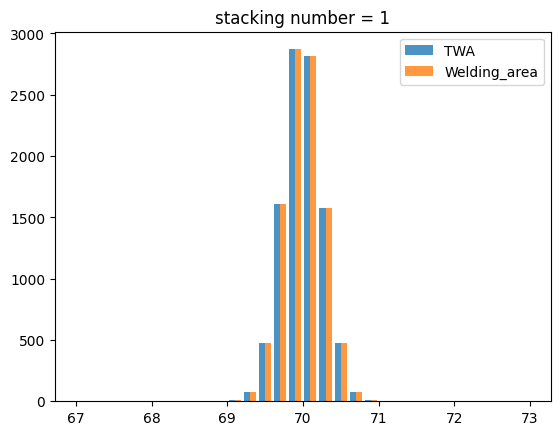

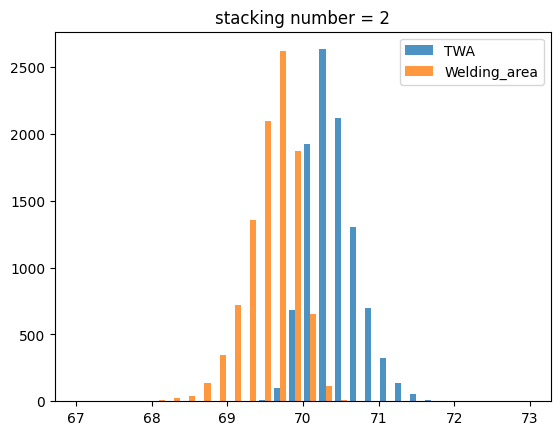

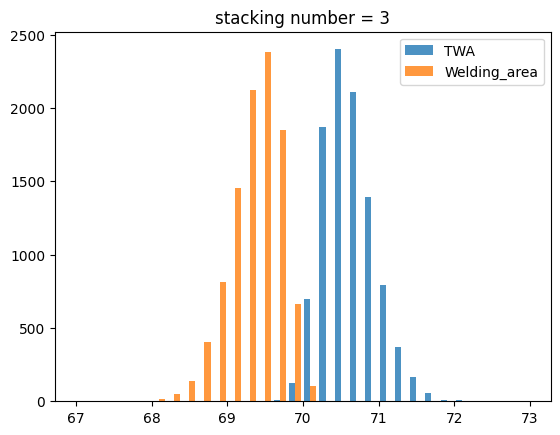

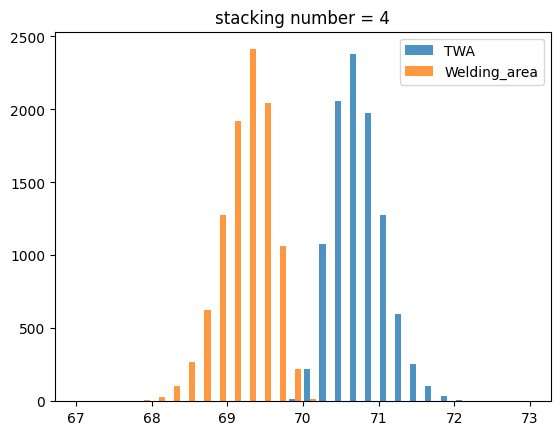

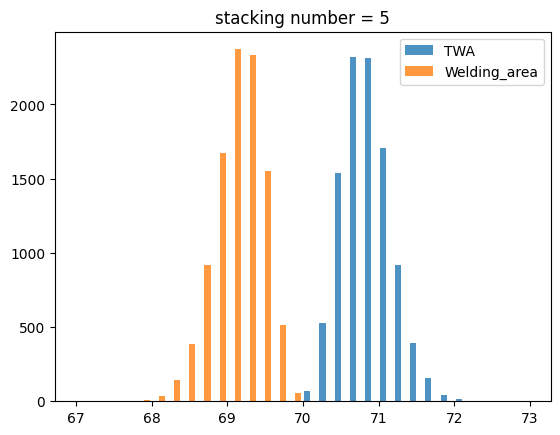

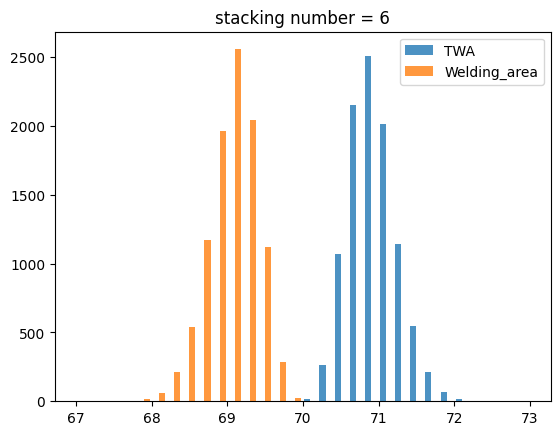

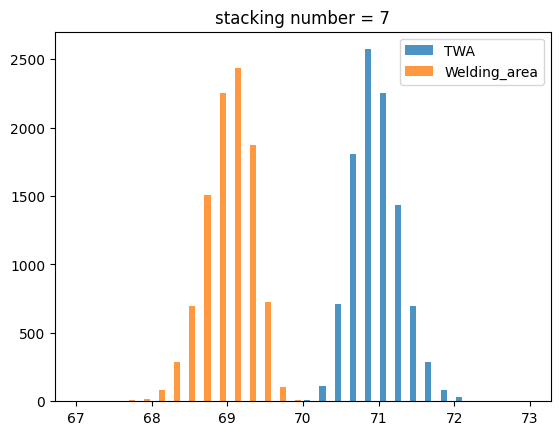

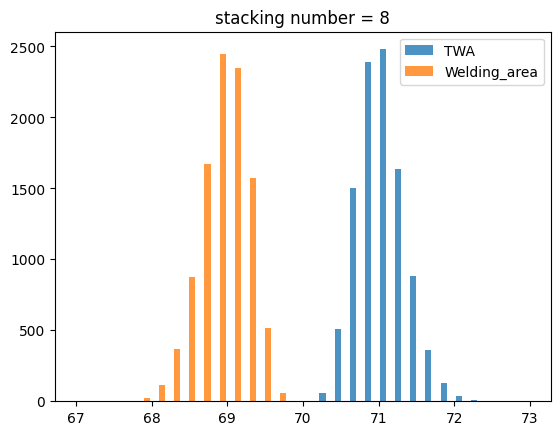

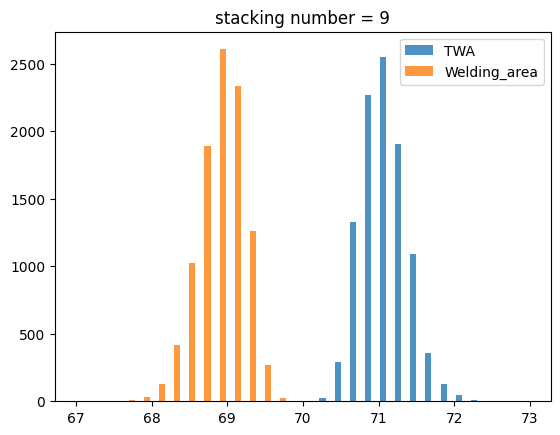

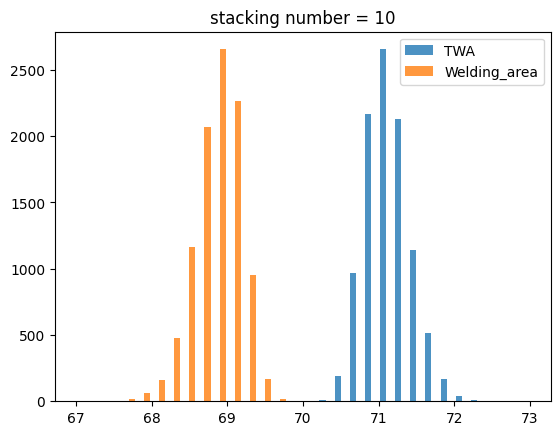

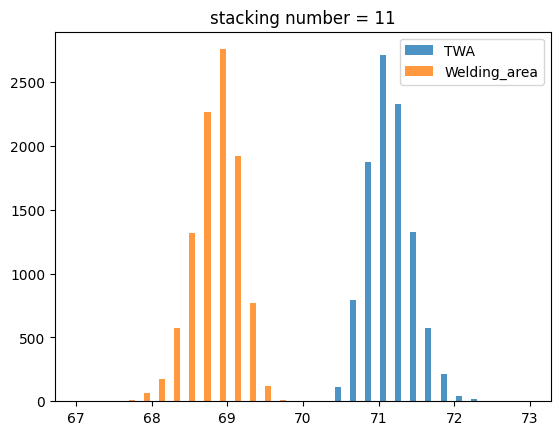

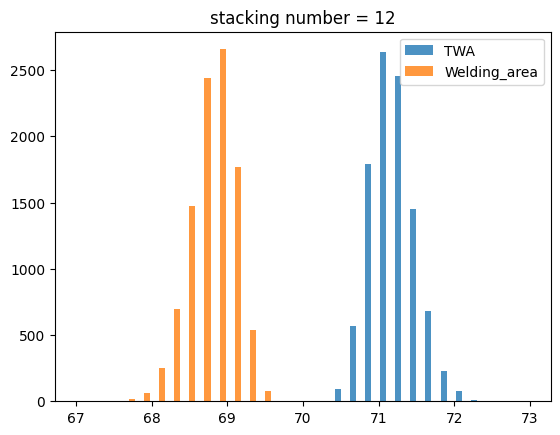

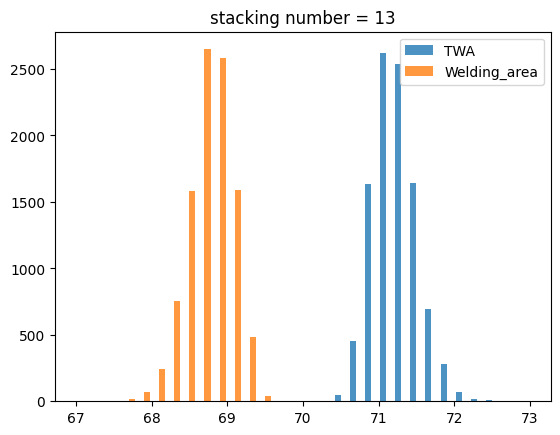

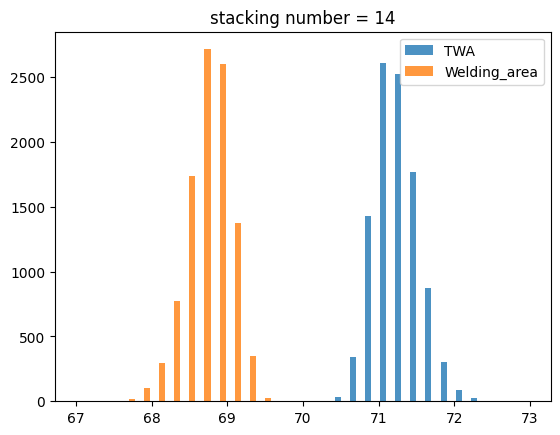

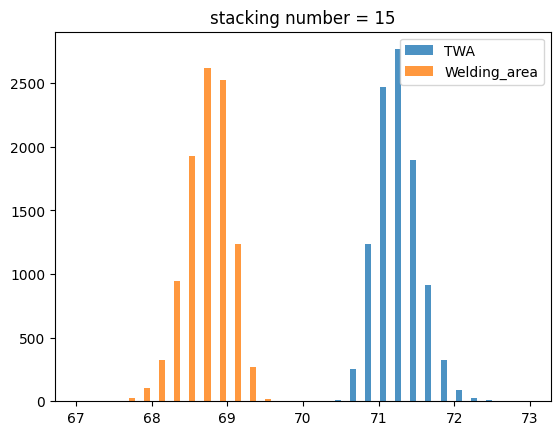

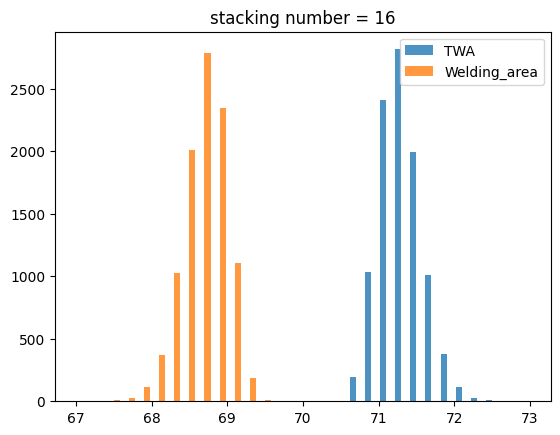

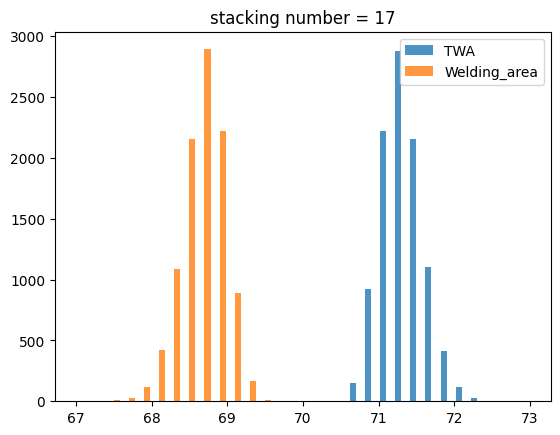

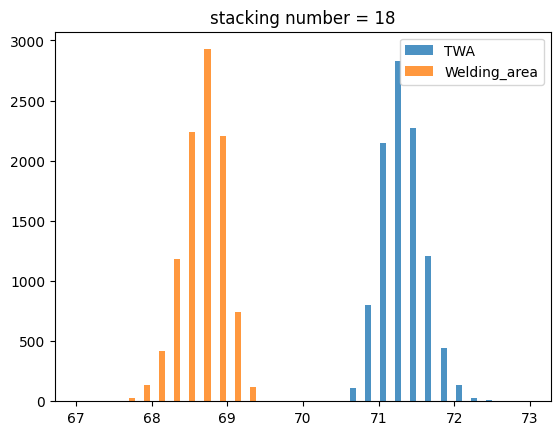

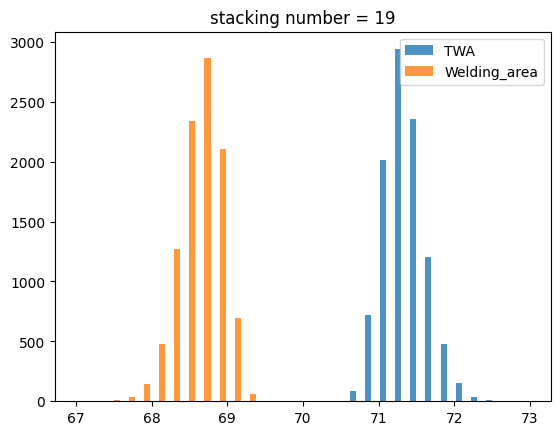

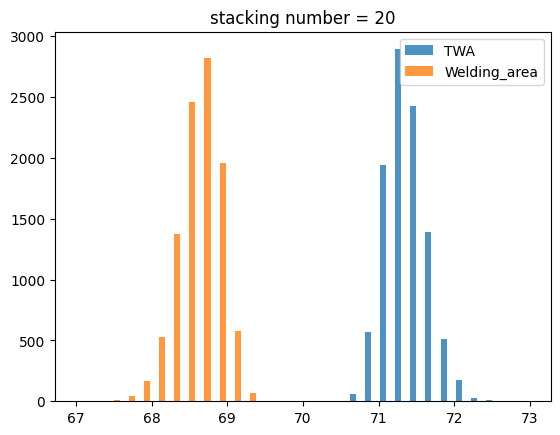

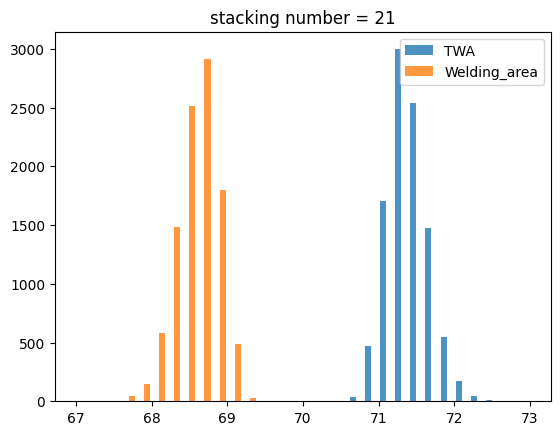

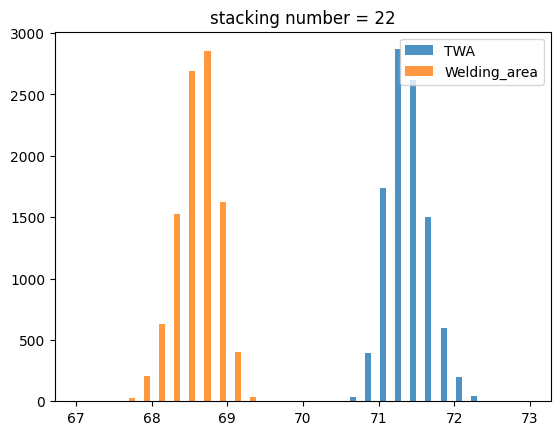

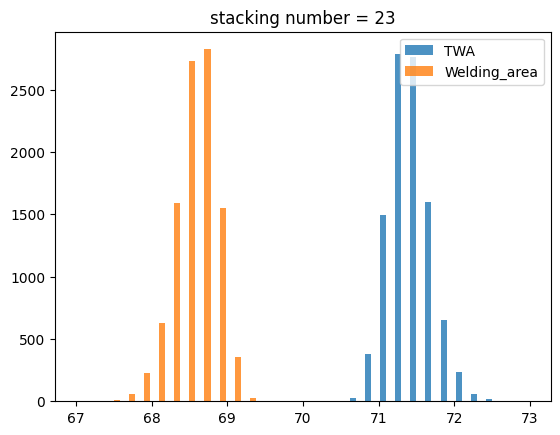

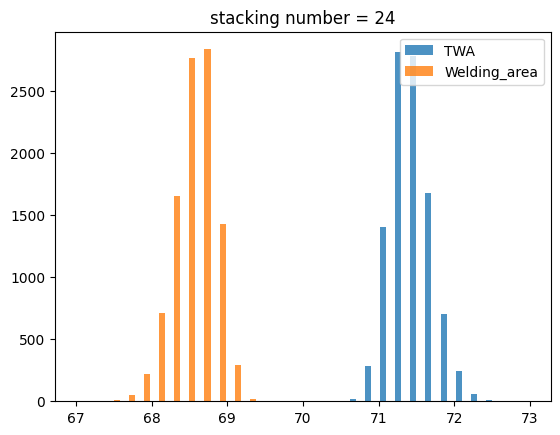

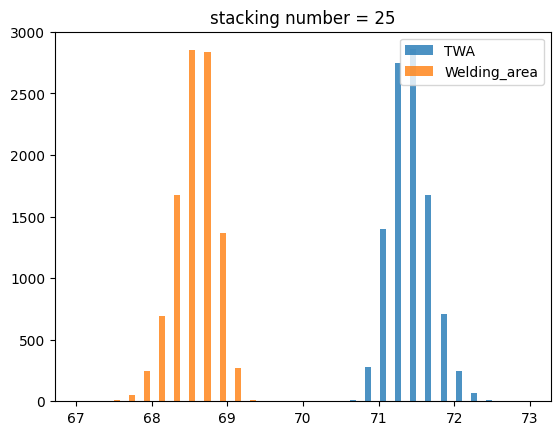

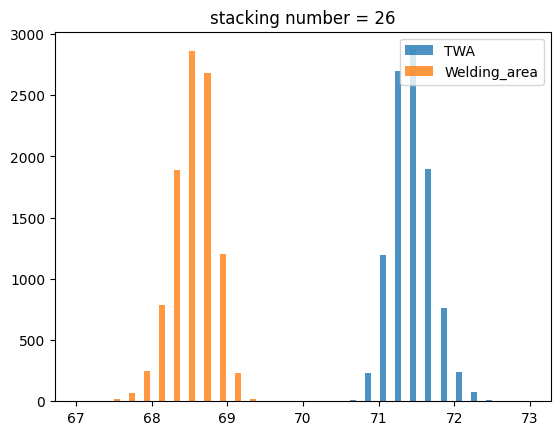

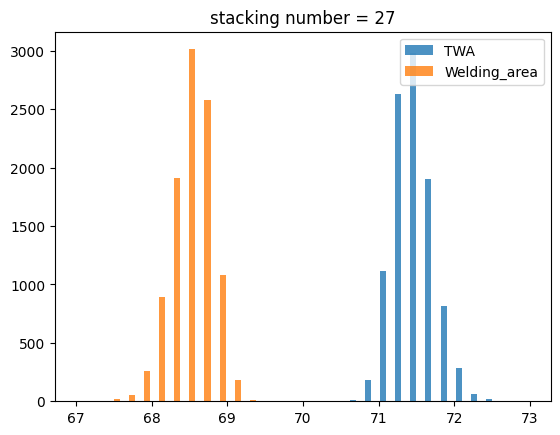

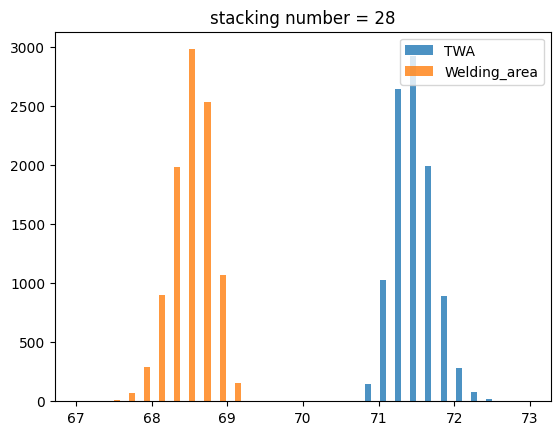

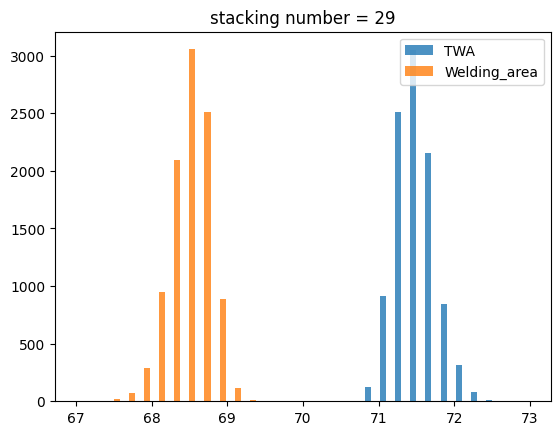

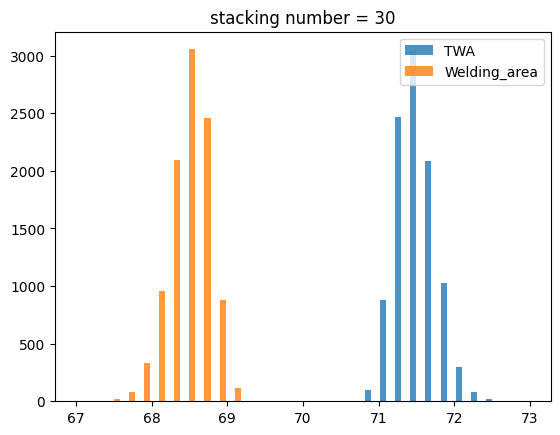

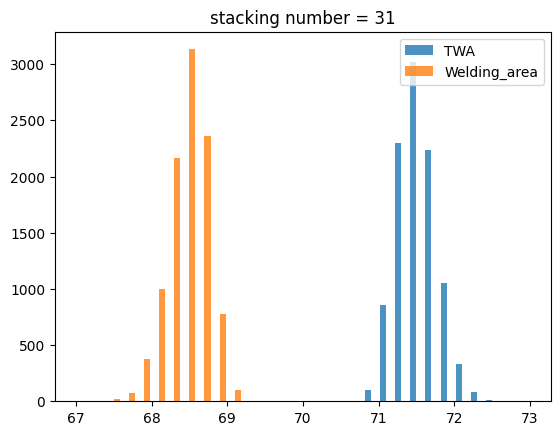

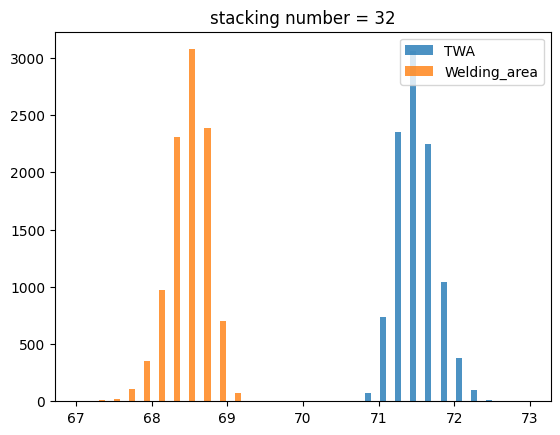

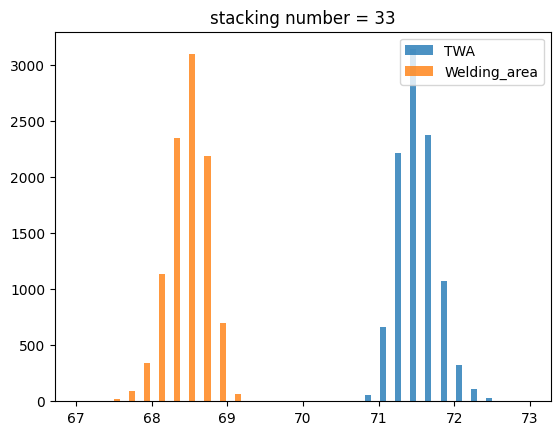

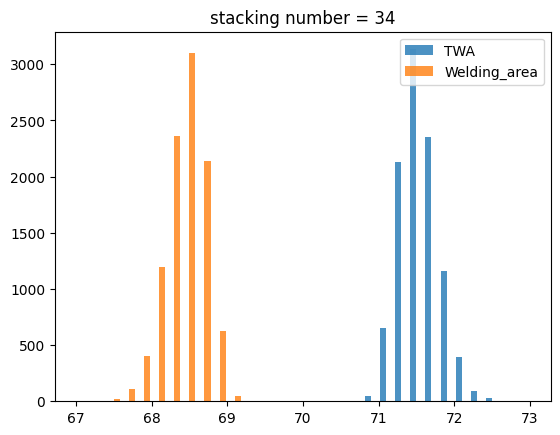

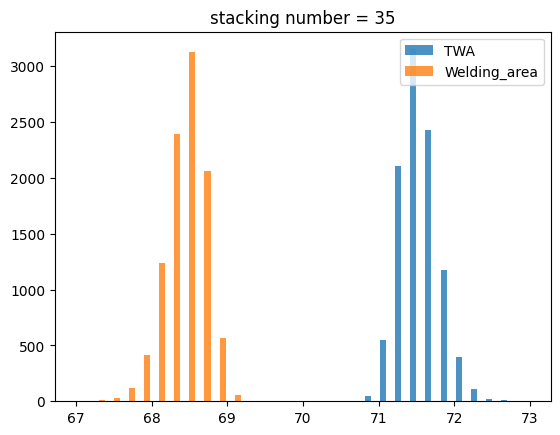

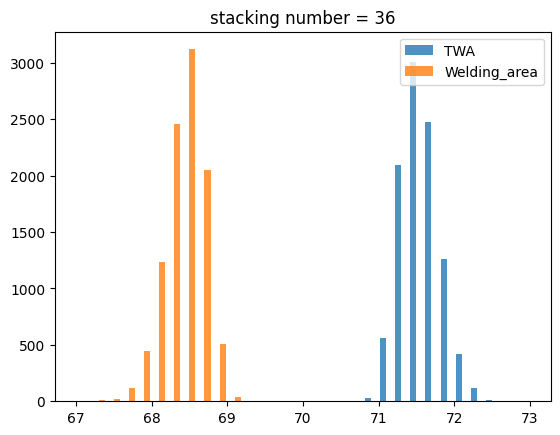

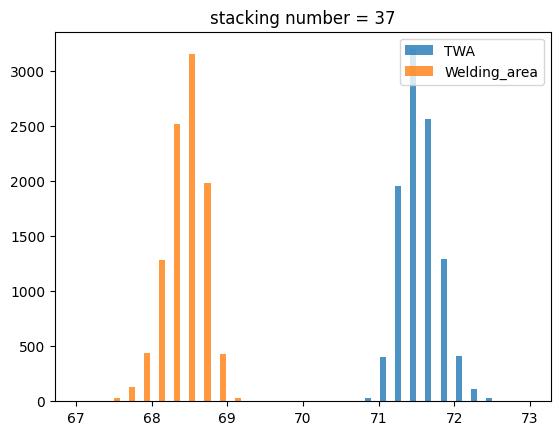

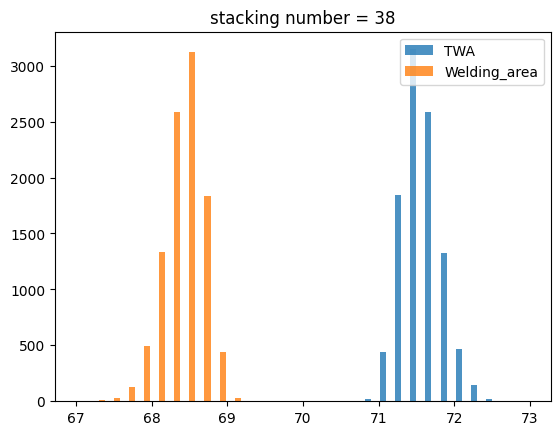

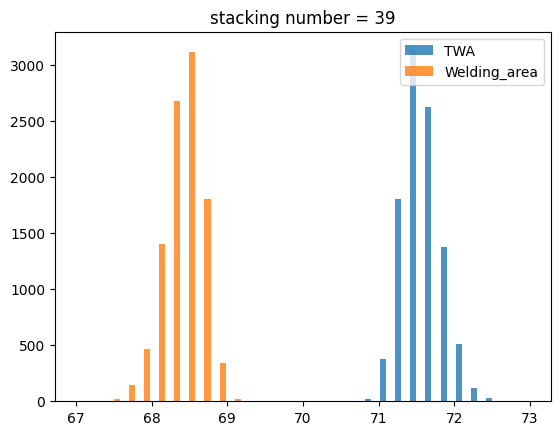

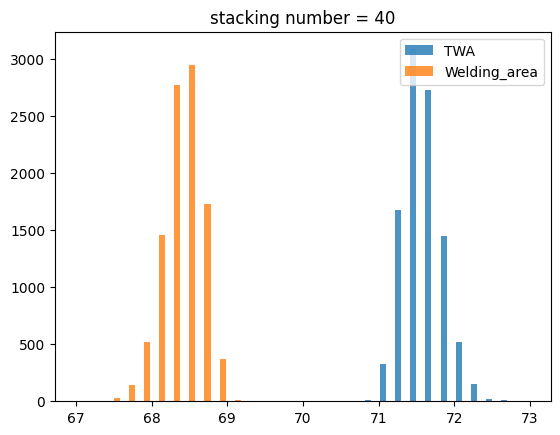

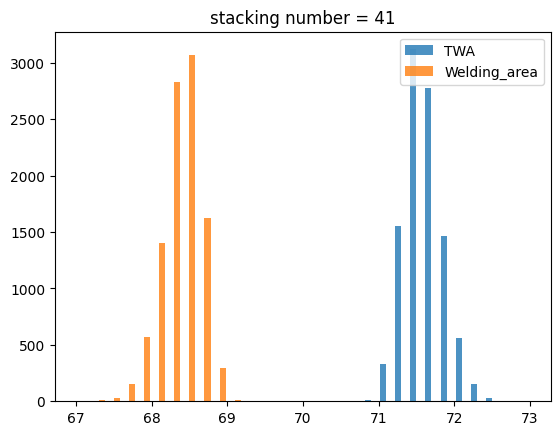

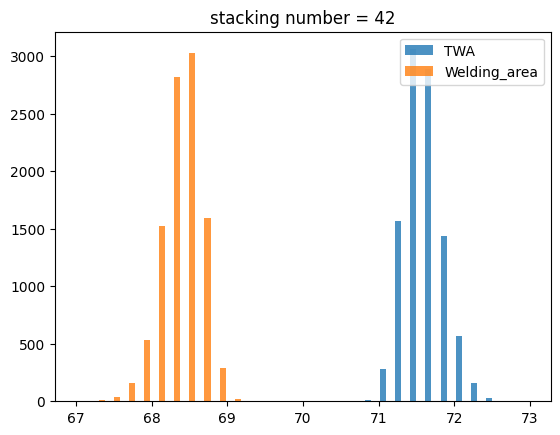

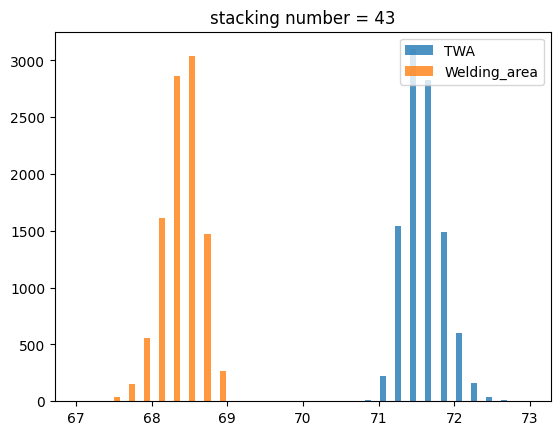

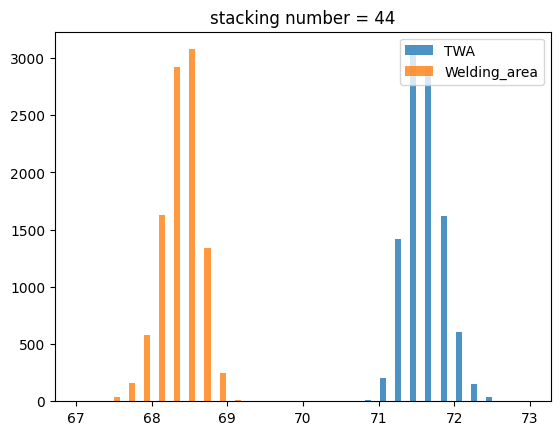

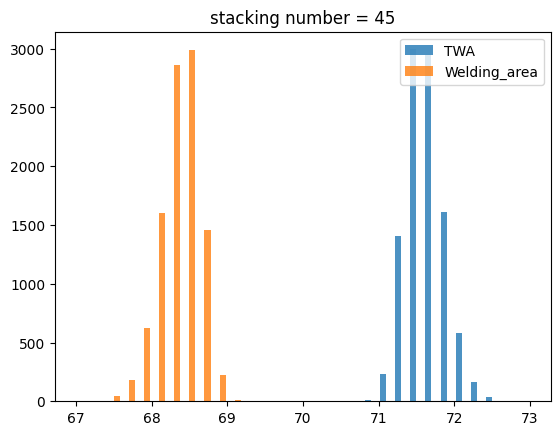

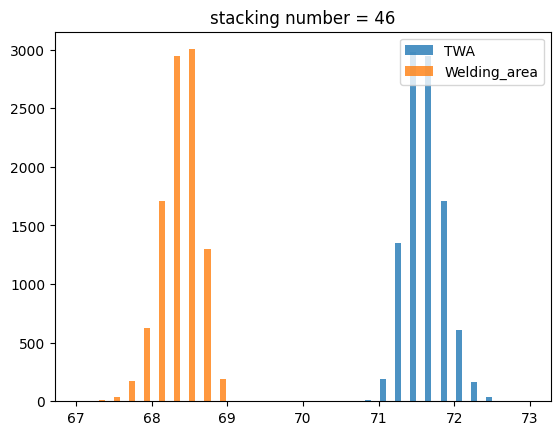

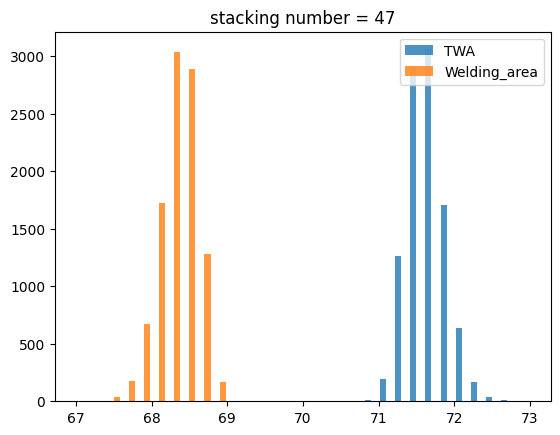

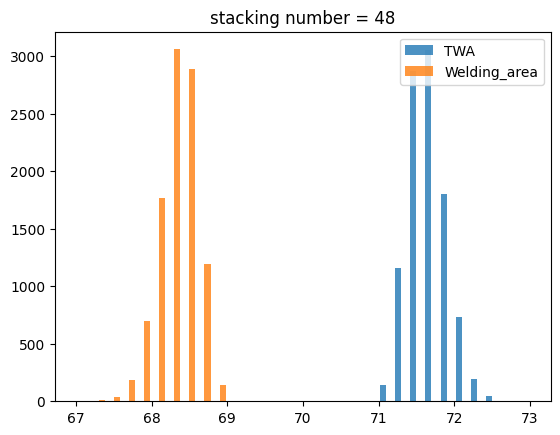

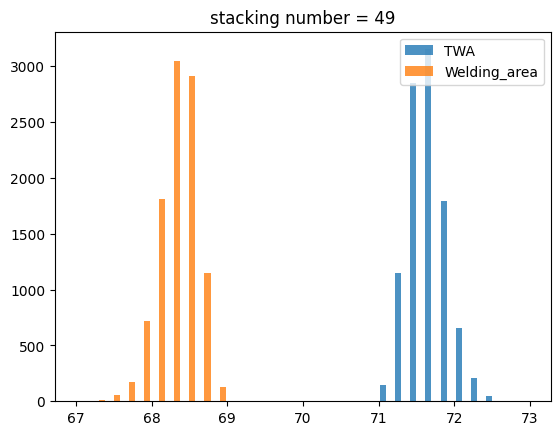

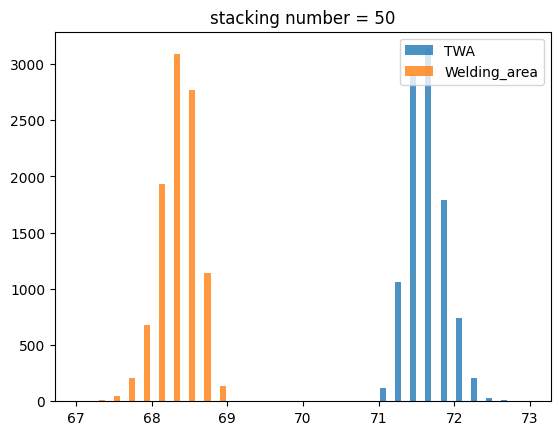

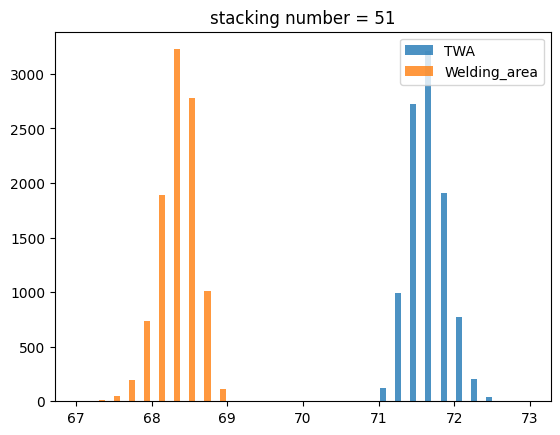

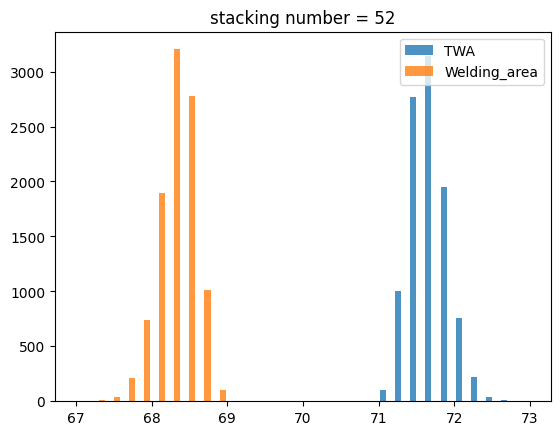

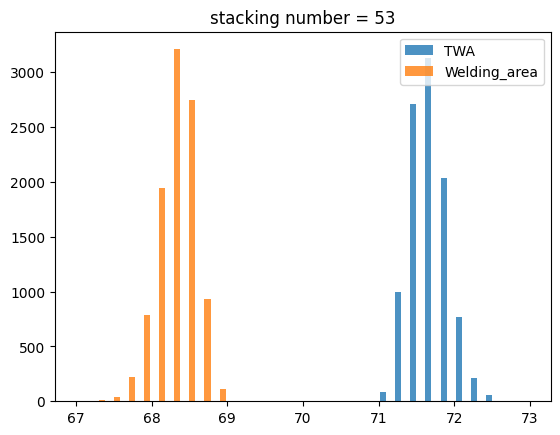

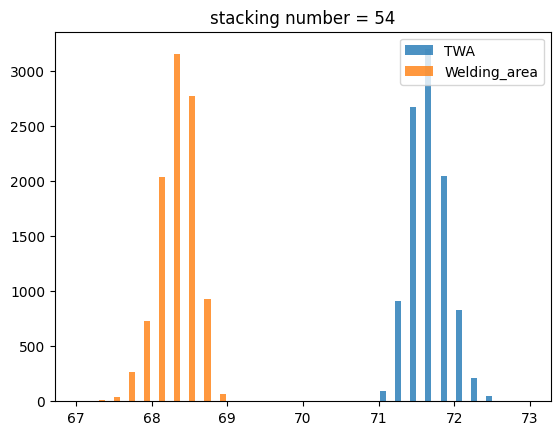

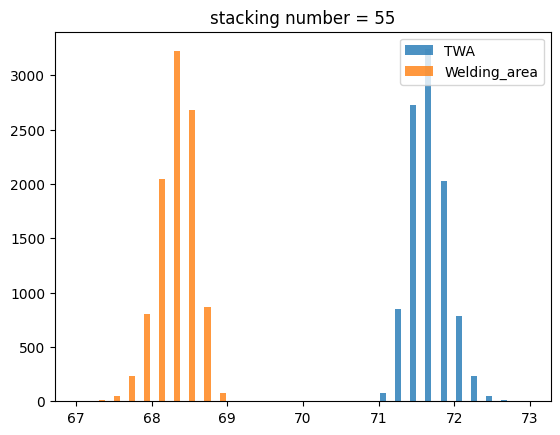

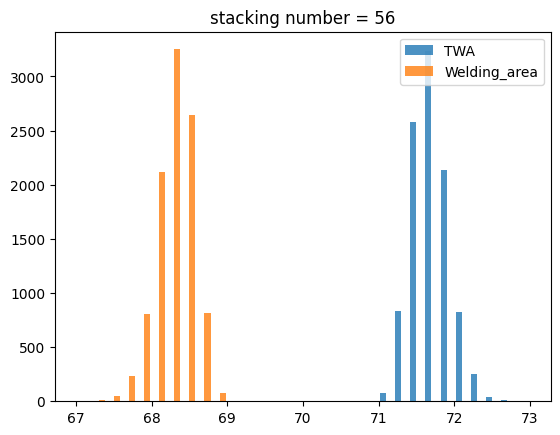

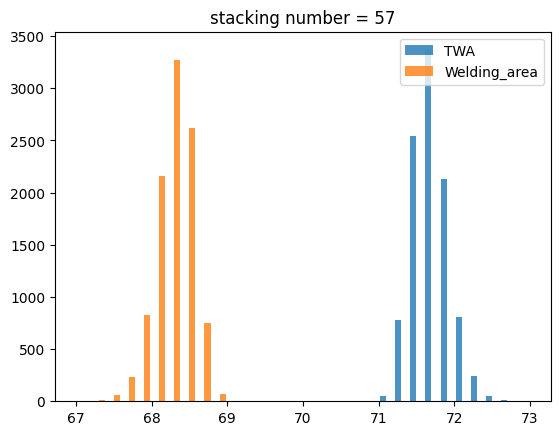

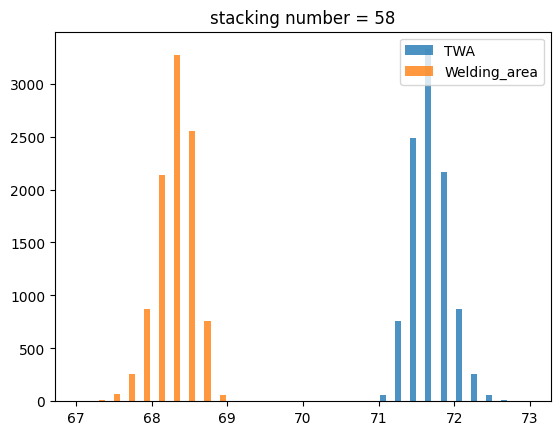

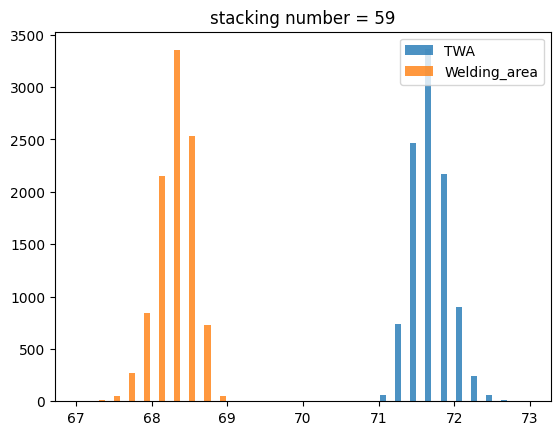

In [4]:
for i in stackingnumber:
  TWA_total = []
  weldingarea_total = []
  spec_out = []
  for j in range(10000):
    stacking_tol = 0.45/4*np.random.randn(i)    #0±0.45, 4시그마 수준
    WC_half = 47.25+0.075/4*np.random.randn(i)
    AC_1 = 1.35+0.85/4*np.random.randn(i)
    TPA = 1.36+0.9/4*np.random.randn(i)
    TWA = 70+1/4*np.random.randn(i)
    stacked_outer_right =  np.max(stacking_tol+WC_half+AC_1-TPA)
    stacked_inner_right =  np.min(stacking_tol+WC_half+AC_1-TPA)
    stacked_outer_left = np.min(stacking_tol+WC_half+AC_1-TPA-TWA)
    stacked_inner_left = np.max(stacking_tol+WC_half+AC_1-TPA-TWA)
    stacked_tab_TWA = stacked_outer_right-stacked_outer_left
    welding_area = stacked_inner_right-stacked_inner_left
    TWA_total.append(stacked_tab_TWA)
    weldingarea_total.append(welding_area)
    if stacked_tab_TWA > 72.5:
      spec_out.append(stacked_tab_TWA)

  spec_out_rate.append(len(spec_out)/10000)
  average.append(np.mean(TWA_total))
  stddev.append(np.std(TWA_total))
  plt.hist([TWA_total, weldingarea_total], bins = 30, range = [67, 73], alpha = 0.8, label = ["TWA", "Welding_area"])
  plt.title(f"stacking number = {i}")
  plt.legend(loc="upper right")
  plt.show()


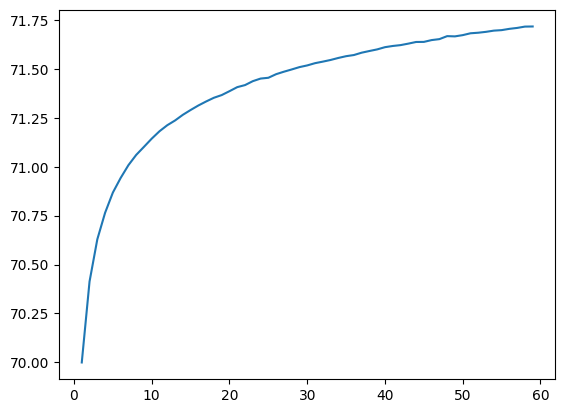

In [5]:
plt.plot(stackingnumber,average)
plt.show()

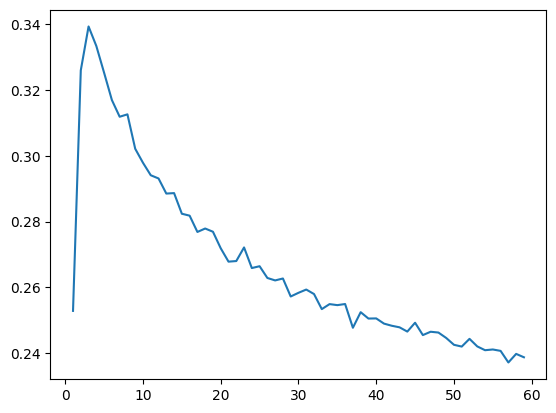

In [6]:
plt.plot(stackingnumber,stddev)
plt.show()

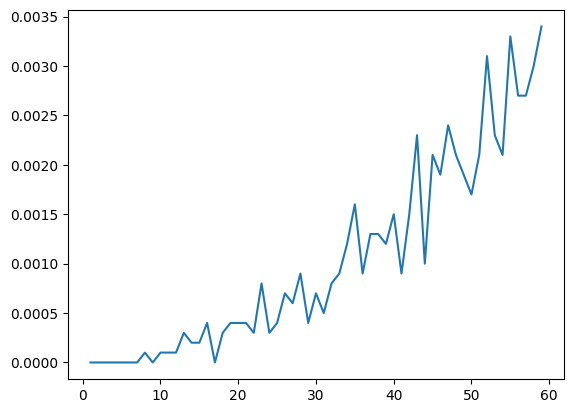

In [7]:
plt.plot(stackingnumber, spec_out_rate)
plt.show()